In [16]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [17]:
# Define State Nodes
class BMIState(TypedDict):
    weight_kg: float  # in kilograms
    height_m: float  # in meters
    bmi: float     # Body Mass Index
    category: str  # BMI Category

In [ ]:
def calculate_bmi(state: BMIState) -> BMIState:
    """Calculate BMI from weight and height."""
    weight = state['weight_kg']
    height = state['height_m']
    bmi_value = weight / (height**2)

    state['bmi'] = round(bmi_value, 2)

    return{
        'weight_kg': weight,
        'height_m': height,
        'bmi': bmi_value
        
    }

In [19]:
def label_bmi_category(state: BMIState) -> BMIState:
    """Label BMI category based on BMI value."""
    bmi_value = state['bmi']
    if bmi_value < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi_value < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi_value < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'

    state['category'] = category

    return{
        'weight_kg': state['weight_kg'],
        'height_m': state['height_m'],
        'bmi': bmi_value,
        'category': category
    }

In [23]:
# Define your Graph 
graph = StateGraph(BMIState)

# Add nodes to your graph
graph.add_node("Calculate BMI", calculate_bmi)
graph.add_node('label_bmi_category' , label_bmi_category)

#Add edges to your graph
graph.add_edge(START, "Calculate BMI")
graph.add_edge("Calculate BMI", 'label_bmi_category')
graph.add_edge("label_bmi_category", END)

# Compile the graph

workflow = graph.compile()



In [26]:
# Execute the graph
intial_state = {
    'weight_kg': 90,
    'height_m': 1.75
}
final_state = workflow.invoke(intial_state)
print("Final State:", final_state)

Final State: {'weight_kg': 90, 'height_m': 1.75, 'bmi': 29.387755102040817, 'category': 'Overweight'}


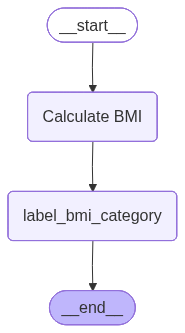

In [27]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())